## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.summary()

from keras import optimizers
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.8684 - accuracy: 0.3327 - val_loss: 1.7990 - val_accuracy: 0.3727
Epoch 2/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.6486 - accuracy: 0.4162 - val_loss: 1.7957 - val_accuracy: 0.3422
Epoch 3/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.5591 - accuracy: 0.4470 - val_loss: 1.5454 - val_accuracy: 0.4478
Epoch 4/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4926 - accuracy: 0.4722 - val_loss: 1.5133 - val_accuracy: 0.4607
Epoch 5/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.4403 - accuracy: 0.4896 - val_loss: 1.4827 - val_accuracy: 0.4739
Epoch 6/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.3963 - accuracy: 0.5049 - val_loss: 1.4488 - val_accuracy: 0.4802
Epoch 7/500
50000/50000 [==============================] - 4s 

Epoch 56/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.3362 - accuracy: 0.8812 - val_loss: 2.2766 - val_accuracy: 0.5196
Epoch 57/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.3163 - accuracy: 0.8917 - val_loss: 2.2842 - val_accuracy: 0.5224
Epoch 58/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.3145 - accuracy: 0.8913 - val_loss: 2.2950 - val_accuracy: 0.5265
Epoch 59/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.2967 - accuracy: 0.8958 - val_loss: 2.2820 - val_accuracy: 0.5364
Epoch 60/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.2821 - accuracy: 0.9016 - val_loss: 2.4812 - val_accuracy: 0.5172
Epoch 61/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.2739 - accuracy: 0.9029 - val_loss: 2.5220 - val_accuracy: 0.5027
Epoch 62/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.2813 - accuracy: 0.8998

Epoch 111/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0923 - accuracy: 0.9680 - val_loss: 3.9507 - val_accuracy: 0.5110
Epoch 112/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.0871 - accuracy: 0.9694 - val_loss: 3.8854 - val_accuracy: 0.5319
Epoch 113/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.0920 - accuracy: 0.9682 - val_loss: 3.9706 - val_accuracy: 0.5221
Epoch 114/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.0676 - accuracy: 0.9765 - val_loss: 3.8790 - val_accuracy: 0.5303
Epoch 115/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0567 - accuracy: 0.9805 - val_loss: 3.9927 - val_accuracy: 0.5299
Epoch 116/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0898 - accuracy: 0.9680 - val_loss: 3.9830 - val_accuracy: 0.5403
Epoch 117/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.0641 - accuracy:

50000/50000 [==============================] - 4s 75us/step - loss: 0.0483 - accuracy: 0.9830 - val_loss: 4.7664 - val_accuracy: 0.5345
Epoch 166/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.0603 - accuracy: 0.9793 - val_loss: 4.8620 - val_accuracy: 0.5333
Epoch 167/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0472 - accuracy: 0.9835 - val_loss: 4.8290 - val_accuracy: 0.5318
Epoch 168/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0511 - accuracy: 0.9825 - val_loss: 4.8436 - val_accuracy: 0.5266
Epoch 169/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.0523 - accuracy: 0.9820 - val_loss: 4.9638 - val_accuracy: 0.5338
Epoch 170/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0466 - accuracy: 0.9834 - val_loss: 4.9233 - val_accuracy: 0.5265
Epoch 171/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0948 - accuracy: 0.9680 - val_

Epoch 219/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.7340e-04 - accuracy: 1.0000 - val_loss: 5.3064 - val_accuracy: 0.5506
Epoch 220/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.7422e-04 - accuracy: 1.0000 - val_loss: 5.3097 - val_accuracy: 0.5502
Epoch 221/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.7219e-04 - accuracy: 1.0000 - val_loss: 5.3140 - val_accuracy: 0.5487
Epoch 222/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.6751e-04 - accuracy: 1.0000 - val_loss: 5.3194 - val_accuracy: 0.5499
Epoch 223/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.6624e-04 - accuracy: 1.0000 - val_loss: 5.3254 - val_accuracy: 0.5499
Epoch 224/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.6386e-04 - accuracy: 1.0000 - val_loss: 5.3259 - val_accuracy: 0.5510
Epoch 225/500
50000/50000 [==============================] - 4s 79us/step - 

50000/50000 [==============================] - 4s 73us/step - loss: 1.0723e-04 - accuracy: 1.0000 - val_loss: 5.4547 - val_accuracy: 0.5508
Epoch 273/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.0603e-04 - accuracy: 1.0000 - val_loss: 5.4533 - val_accuracy: 0.5512
Epoch 274/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.0562e-04 - accuracy: 1.0000 - val_loss: 5.4558 - val_accuracy: 0.5504
Epoch 275/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.0489e-04 - accuracy: 1.0000 - val_loss: 5.4591 - val_accuracy: 0.5507
Epoch 276/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.0408e-04 - accuracy: 1.0000 - val_loss: 5.4630 - val_accuracy: 0.5511
Epoch 277/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.0328e-04 - accuracy: 1.0000 - val_loss: 5.4650 - val_accuracy: 0.5511
Epoch 278/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.0285e-

50000/50000 [==============================] - 4s 72us/step - loss: 7.9907e-05 - accuracy: 1.0000 - val_loss: 5.5424 - val_accuracy: 0.5514
Epoch 326/500
50000/50000 [==============================] - 4s 72us/step - loss: 7.9234e-05 - accuracy: 1.0000 - val_loss: 5.5436 - val_accuracy: 0.5519
Epoch 327/500
50000/50000 [==============================] - 4s 73us/step - loss: 7.9664e-05 - accuracy: 1.0000 - val_loss: 5.5452 - val_accuracy: 0.5516
Epoch 328/500
50000/50000 [==============================] - 4s 74us/step - loss: 7.8779e-05 - accuracy: 1.0000 - val_loss: 5.5490 - val_accuracy: 0.5516
Epoch 329/500
50000/50000 [==============================] - 4s 74us/step - loss: 7.8656e-05 - accuracy: 1.0000 - val_loss: 5.5485 - val_accuracy: 0.5519
Epoch 330/500
50000/50000 [==============================] - 4s 73us/step - loss: 7.7914e-05 - accuracy: 1.0000 - val_loss: 5.5489 - val_accuracy: 0.5515
Epoch 331/500
50000/50000 [==============================] - 4s 73us/step - loss: 7.7869e-

50000/50000 [==============================] - 4s 76us/step - loss: 6.5166e-05 - accuracy: 1.0000 - val_loss: 5.6104 - val_accuracy: 0.5523
Epoch 379/500
50000/50000 [==============================] - 4s 77us/step - loss: 6.4390e-05 - accuracy: 1.0000 - val_loss: 5.6106 - val_accuracy: 0.5526
Epoch 380/500
50000/50000 [==============================] - 4s 76us/step - loss: 6.4535e-05 - accuracy: 1.0000 - val_loss: 5.6119 - val_accuracy: 0.5528
Epoch 381/500
50000/50000 [==============================] - 4s 76us/step - loss: 6.4235e-05 - accuracy: 1.0000 - val_loss: 5.6135 - val_accuracy: 0.5522
Epoch 382/500
50000/50000 [==============================] - 4s 76us/step - loss: 6.4349e-05 - accuracy: 1.0000 - val_loss: 5.6139 - val_accuracy: 0.5526
Epoch 383/500
50000/50000 [==============================] - 4s 75us/step - loss: 6.3489e-05 - accuracy: 1.0000 - val_loss: 5.6168 - val_accuracy: 0.5531
Epoch 384/500
50000/50000 [==============================] - 6s 116us/step - loss: 6.3454e

Epoch 431/500
50000/50000 [==============================] - 7s 135us/step - loss: 5.5004e-05 - accuracy: 1.0000 - val_loss: 5.6631 - val_accuracy: 0.5539
Epoch 432/500
50000/50000 [==============================] - 7s 136us/step - loss: 5.4833e-05 - accuracy: 1.0000 - val_loss: 5.6637 - val_accuracy: 0.5540
Epoch 433/500
50000/50000 [==============================] - 7s 138us/step - loss: 5.4703e-05 - accuracy: 1.0000 - val_loss: 5.6633 - val_accuracy: 0.5540
Epoch 434/500
50000/50000 [==============================] - 7s 133us/step - loss: 5.4465e-05 - accuracy: 1.0000 - val_loss: 5.6650 - val_accuracy: 0.5541
Epoch 435/500
50000/50000 [==============================] - 7s 132us/step - loss: 5.4511e-05 - accuracy: 1.0000 - val_loss: 5.6667 - val_accuracy: 0.5536
Epoch 436/500
50000/50000 [==============================] - 7s 134us/step - loss: 5.4168e-05 - accuracy: 1.0000 - val_loss: 5.6661 - val_accuracy: 0.5539
Epoch 437/500
50000/50000 [==============================] - 7s 135us/

50000/50000 [==============================] - 6s 128us/step - loss: 4.7949e-05 - accuracy: 1.0000 - val_loss: 5.7081 - val_accuracy: 0.5544
Epoch 484/500
50000/50000 [==============================] - 6s 127us/step - loss: 4.8115e-05 - accuracy: 1.0000 - val_loss: 5.7074 - val_accuracy: 0.5547
Epoch 485/500
50000/50000 [==============================] - 7s 131us/step - loss: 4.7755e-05 - accuracy: 1.0000 - val_loss: 5.7091 - val_accuracy: 0.5547
Epoch 486/500
50000/50000 [==============================] - 7s 134us/step - loss: 4.7644e-05 - accuracy: 1.0000 - val_loss: 5.7095 - val_accuracy: 0.5547
Epoch 487/500
50000/50000 [==============================] - 7s 132us/step - loss: 4.7509e-05 - accuracy: 1.0000 - val_loss: 5.7112 - val_accuracy: 0.5548
Epoch 488/500
50000/50000 [==============================] - 7s 131us/step - loss: 4.7484e-05 - accuracy: 1.0000 - val_loss: 5.7101 - val_accuracy: 0.5543
Epoch 489/500
50000/50000 [==============================] - 6s 128us/step - loss: 4

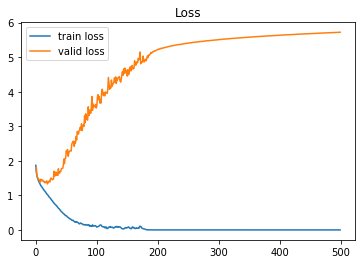

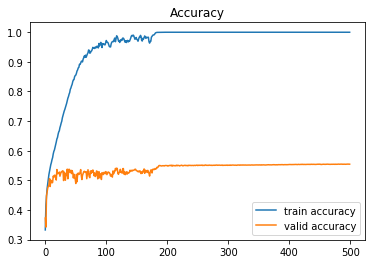

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()